In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from matplotlib.ticker import PercentFormatter

In [ ]:
google = pd.read_excel("/content/drive/MyDrive/Acelera/Arquivos - Marketing e Vendas/Base_Google_Ads.xlsx")

In [ ]:
google.head()

,Dia,Tipo de Campanha,Produto/Anúncio,Impressões do anúncio,Cliques,Custo,Conversões,Receita
0,2022-09-01,Institucional,Empréstimo,1080,150,300.6,0,0
1,2022-09-01,Remarketing,Empréstimo,19960,100,80.2,0,0
2,2022-09-02,Remarketing,Empréstimo,19650,110,87.9,0,0
3,2022-09-02,Institucional,Empréstimo,890,110,161.6,0,0
4,2022-09-03,Remarketing,Empréstimo,20510,160,103.2,0,0


In [ ]:
google['Mês'] = google['Dia'].dt.to_period('M')

In [ ]:
google.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Impressões do anúncio,608.0,18845.53,40517.86,180.0,1290.00,4250.0,31895.0,837730.0
Cliques,608.0,350.94,330.65,0.0,140.00,225.0,400.0,1900.0
Custo,608.0,476.45,451.52,0.0,182.95,375.5,636.1,5651.8
Conversões,608.0,0.23,0.76,0.0,0.00,0.0,0.0,10.0
Receita,608.0,2629.76,8660.29,0.0,0.00,0.0,0.0,135000.0


In [ ]:
freq_abs = pd.DataFrame(google['Tipo de Campanha'].value_counts())
freq_rel = pd.DataFrame(google['Tipo de Campanha'].value_counts(1)*100)
freq_tipo_campanha = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_tipo_campanha.columns = ['Tipo de Campanha', 'Qtde', '%']
freq_tipo_campanha.round({'%': 2})

,Tipo de Campanha,Qtde,%
0,Institucional,181,29.77
1,Remarketing,177,29.11
2,Conversão,158,25.99
3,Conversão-Youtube,92,15.13


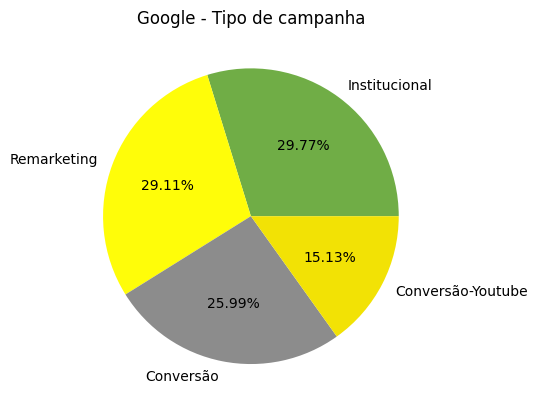

In [ ]:
colors=["#70AD46", "#FFFD09", "#8C8C8C", "#F2E205"]
plt.pie(freq_tipo_campanha['%'], labels = freq_tipo_campanha['Tipo de Campanha'], autopct='%.2f%%', colors=colors)
plt.title("Google - Tipo de campanha")
plt.show()

In [ ]:
freq_abs = pd.DataFrame(google['Produto/Anúncio'].value_counts())
freq_rel = pd.DataFrame(google['Produto/Anúncio'].value_counts(1)*100)
freq_produto_anuncio = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_produto_anuncio.columns = ['Produto/Anúncio', 'Qtde', '%']
freq_produto_anuncio.round({'%': 2})

,Produto/Anúncio,Qtde,%
0,Empréstimo,608,100.0


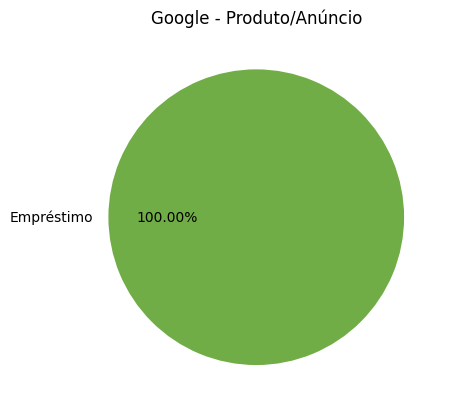

In [ ]:
plt.pie(freq_produto_anuncio['%'], labels = freq_produto_anuncio['Produto/Anúncio'], autopct='%.2f%%', colors=colors)
plt.title("Google - Produto/Anúncio")
plt.show()

In [ ]:
freq_abs = pd.DataFrame(google.groupby('Mês')['Impressões do anúncio'].sum())
freq_rel = pd.DataFrame(google.groupby('Mês')['Impressões do anúncio'].sum()/google['Impressões do anúncio'].sum()*100)
freq_impressoes = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_impressoes.columns = ['Mês', 'Impressões do anúncio', '% Impressões do anúncio']
freq_impressoes = freq_impressoes.round({'% Impressões do anúncio': 2})

In [ ]:
freq_abs = pd.DataFrame(google.groupby('Mês')['Cliques'].sum())
freq_rel = pd.DataFrame(google.groupby('Mês')['Cliques'].sum()/google['Cliques'].sum()*100)
freq_cliques = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_cliques.columns = ['Mês', 'Cliques', '% Cliques']
freq_cliques = freq_cliques.round({'% Cliques': 2})

In [ ]:
freq_abs = pd.DataFrame(google.groupby('Mês')['Conversões'].sum())
freq_rel = pd.DataFrame(google.groupby('Mês')['Conversões'].sum()/google['Conversões'].sum()*100)
freq_conversoes = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_conversoes.columns = ['Mês', 'Conversões', '% Conversões']
freq_conversoes = freq_conversoes.round({'% Conversões': 2})


In [ ]:
anuncios_google = freq_impressoes.merge(freq_cliques.merge(freq_conversoes, how='left'), how='left')
anuncios_google['cliques/impressões'] = (anuncios_google['Cliques']/anuncios_google['Impressões do anúncio']*100).round(2)
anuncios_google['conversões/cliques'] = (anuncios_google['Conversões']/anuncios_google['Cliques']*100).round(2)
anuncios_google

,Mês,Impressões do anúncio,% Impressões do anúncio,Cliques,% Cliques,Conversões,% Conversões,cliques/impressões,conversões/cliques
0,2022-09,699620,6.11,11780,5.52,16,11.59,1.68,0.14
1,2022-10,1272750,11.11,20270,9.50,16,11.59,1.59,0.08
2,2022-11,2284600,19.94,25570,11.98,38,27.54,1.12,0.15
3,2022-12,3172150,27.68,48640,22.80,12,8.70,1.53,0.02
4,2023-01,1903010,16.61,52570,24.64,33,23.91,2.76,0.06
5,2023-02,2125950,18.55,54540,25.56,23,16.67,2.57,0.04


In [ ]:
anuncios_plot = anuncios_google[['Mês','% Impressões do anúncio', '% Cliques','% Conversões']]
anuncios_plot = anuncios_plot.melt(id_vars='Mês', 
        var_name="Indicador", 
        value_name="%")


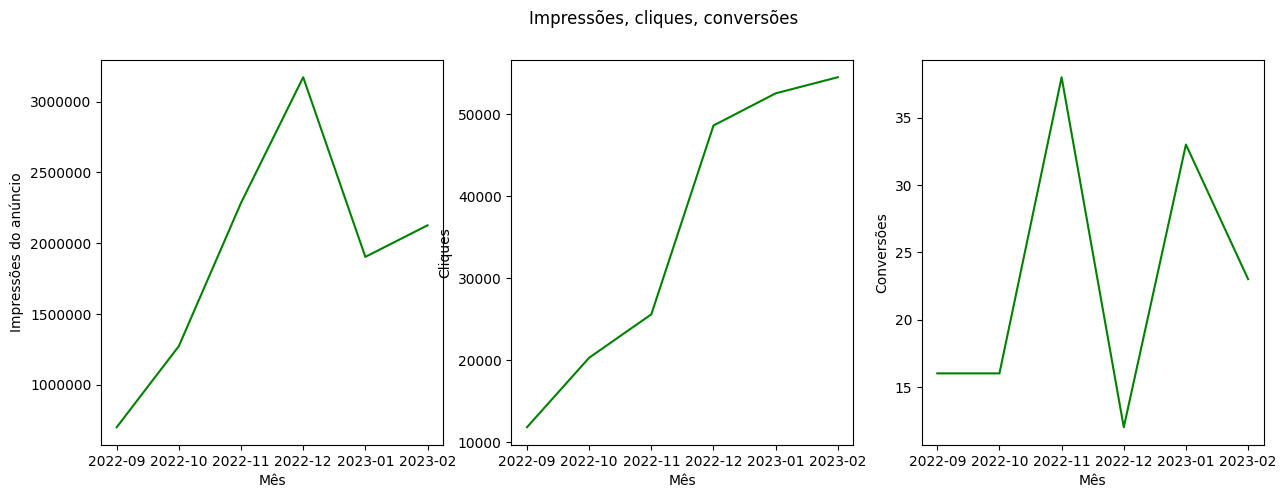

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Impressões, cliques, conversões')
sns.lineplot(ax = ax1, data=anuncios_google, x=anuncios_google['Mês'].astype(str), y='Impressões do anúncio', color='green');
ax1.ticklabel_format(style='plain', axis='y')
sns.lineplot(ax = ax2, data=anuncios_google, x=anuncios_google['Mês'].astype(str), y='Cliques', color='green');
sns.lineplot(ax = ax3, data=anuncios_google, x=anuncios_google['Mês'].astype(str), y='Conversões', color='green');
plt.ticklabel_format(style='plain', axis='y')


In [ ]:
freq_abs = pd.DataFrame(google.groupby('Mês')['Custo'].sum())
freq_rel = pd.DataFrame(google.groupby('Mês')['Custo'].sum()/google['Custo'].sum()*100)
freq_custos = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_custos.columns = ['Mês', 'Custo', '% Custo']
freq_custos = freq_custos.round({'% Custo': 2})

In [ ]:
freq_abs = pd.DataFrame(google.groupby('Mês')['Receita'].sum())
freq_rel = pd.DataFrame(google.groupby('Mês')['Receita'].sum()/google['Receita'].sum()*100)
freq_receita = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_receita.columns = ['Mês', 'Receita', '% Receita']
freq_receita = freq_receita.round({'% Receita': 2})

In [ ]:
receita_custo = freq_receita.merge(freq_custos, how='left')
receita_custo['custo/receita'] = (receita_custo['Custo']/receita_custo['Receita']*100).round(2)
receita_custo

,Mês,Receita,% Receita,Custo,% Custo,custo/receita
0,2022-09,179460,11.22,19747.9,6.82,11.00
1,2022-10,194685,12.18,37308.7,12.88,19.16
2,2022-11,532950,33.33,42643.8,14.72,8.00
3,2022-12,165270,10.34,54064.2,18.66,32.71
4,2023-01,282870,17.69,63057.9,21.77,22.29
5,2023-02,243660,15.24,72861.4,25.15,29.90


In [ ]:
receita_plot = receita_custo[['Mês','Receita', 'Custo']]
receita_plot = receita_plot.melt(id_vars='Mês', 
        var_name="Indicador", 
        value_name="R$")

<ipython-input-74-5b6a51d87332>:1: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.lineplot(data=receita_plot, x=receita_plot['Mês'].astype(str), y='R$', hue='Indicador', palette=colors);


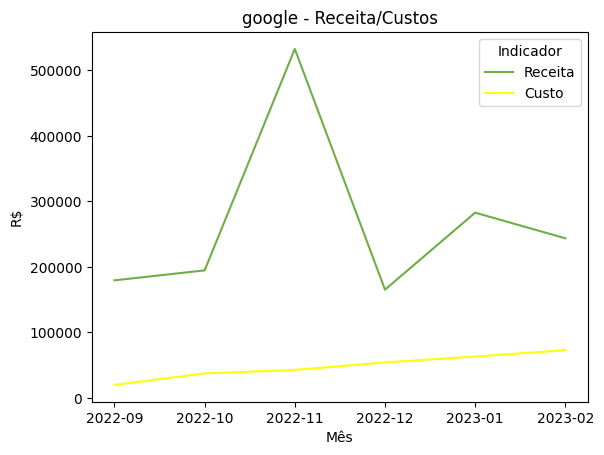

In [ ]:
sns.lineplot(data=receita_plot, x=receita_plot['Mês'].astype(str), y='R$', hue='Indicador', palette=colors);
plt.title("google - Receita/Custos");
plt.ticklabel_format(style='plain', axis='y')
plt.show();

## Análise bivariada


In [ ]:
campanha_impressoes = google['Impressões do anúncio'].groupby(google['Tipo de Campanha']).sum().reset_index()
campanha_impressoes.columns = ['Tipo de Campanha','Impressões do anúncio']
campanha_impressoes_perc = (google['Impressões do anúncio'].groupby(google['Tipo de Campanha']).sum()/google['Impressões do anúncio'].sum()*100).reset_index().round(2)
campanha_impressoes_perc.columns = ['Tipo de Campanha', '%']
freq_campanha_impressao = pd.merge(campanha_impressoes, campanha_impressoes_perc, on = 'Tipo de Campanha')
freq_campanha_impressao

,Tipo de Campanha,Impressões do anúncio,%
0,Conversão,527410,4.60
1,Conversão-Youtube,4253370,37.12
2,Institucional,196080,1.71
3,Remarketing,6481220,56.56


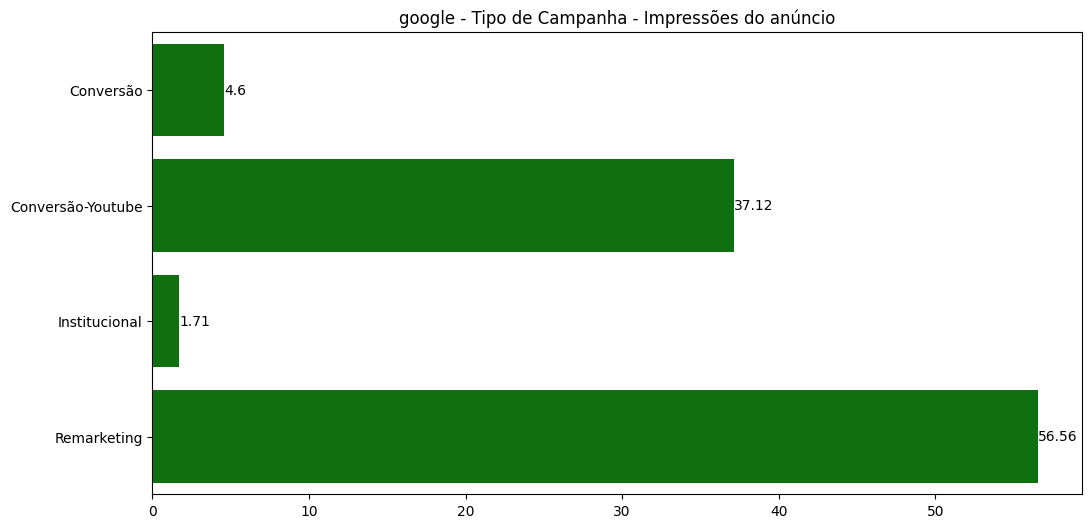

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_campanha_impressao, x= "%", y= 'Tipo de Campanha', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('google - Tipo de Campanha - Impressões do anúncio')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
campanha_cliques = google['Cliques'].groupby(google['Tipo de Campanha']).sum().reset_index()
campanha_cliques.columns = ['Tipo de Campanha','Cliques']
campanha_cliques_perc = (google['Cliques'].groupby(google['Tipo de Campanha']).sum()/google['Cliques'].sum()*100).reset_index().round(2)
campanha_cliques_perc.columns = ['Tipo de Campanha', '%']
freq_campanha_cliques = pd.merge(campanha_cliques, campanha_cliques_perc, on = 'Tipo de Campanha')
freq_campanha_cliques

,Tipo de Campanha,Cliques,%
0,Conversão,40710,19.08
1,Conversão-Youtube,30530,14.31
2,Institucional,32420,15.19
3,Remarketing,109710,51.42


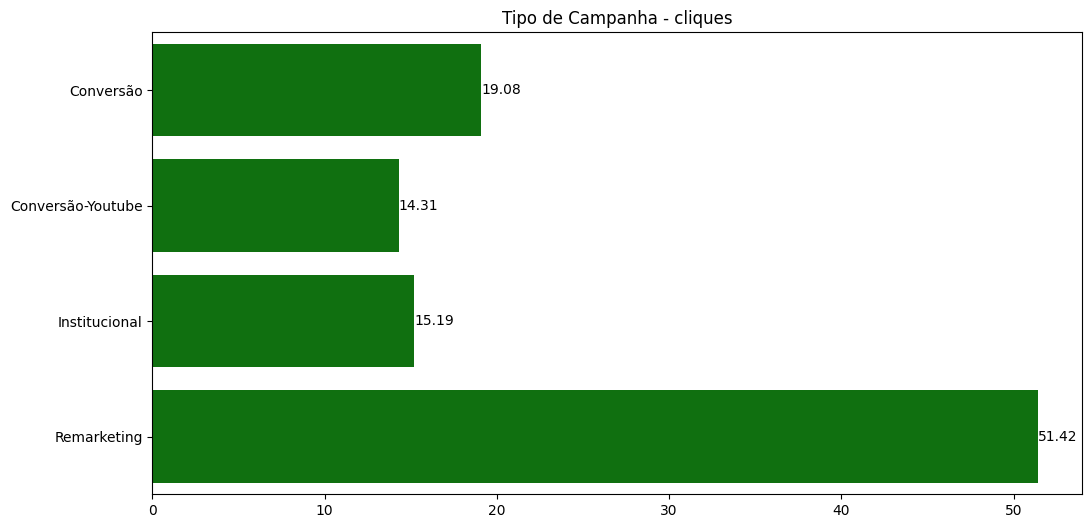

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_campanha_cliques, x= "%", y= 'Tipo de Campanha', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('Tipo de Campanha - cliques')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
campanha_custo = google['Custo'].groupby(google['Tipo de Campanha']).sum().reset_index()
campanha_custo.columns = ['Tipo de Campanha','Custo']
campanha_custo_perc = (google['Custo'].groupby(google['Tipo de Campanha']).sum()/google['Custo'].sum()*100).reset_index().round(2)
campanha_custo_perc.columns = ['Tipo de Campanha', '%']
freq_campanha_custo = pd.merge(campanha_custo, campanha_custo_perc, on = 'Tipo de Campanha')
freq_campanha_custo

,Tipo de Campanha,Custo,%
0,Conversão,123826.5,42.75
1,Conversão-Youtube,71743.3,24.77
2,Institucional,38022.8,13.13
3,Remarketing,56091.3,19.36


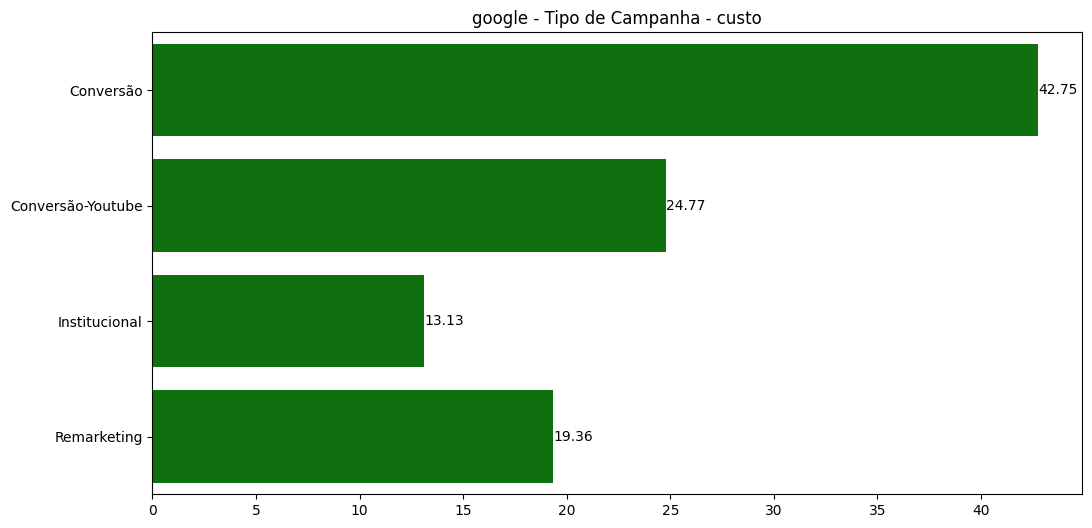

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_campanha_custo, x= "%", y= 'Tipo de Campanha', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('google - Tipo de Campanha - custo')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
campanha_conversoes = google['Conversões'].groupby(google['Tipo de Campanha']).sum().reset_index()
campanha_conversoes.columns = ['Tipo de Campanha','Conversões']
campanha_conversoes_perc = (google['Conversões'].groupby(google['Tipo de Campanha']).sum()/google['Conversões'].sum()*100).reset_index().round(2)
campanha_conversoes_perc.columns = ['Tipo de Campanha', '%']
freq_campanha_conversoes = pd.merge(campanha_conversoes, campanha_conversoes_perc, on = 'Tipo de Campanha')
freq_campanha_conversoes

,Tipo de Campanha,Conversões,%
0,Conversão,14,10.14
1,Conversão-Youtube,34,24.64
2,Institucional,78,56.52
3,Remarketing,12,8.70


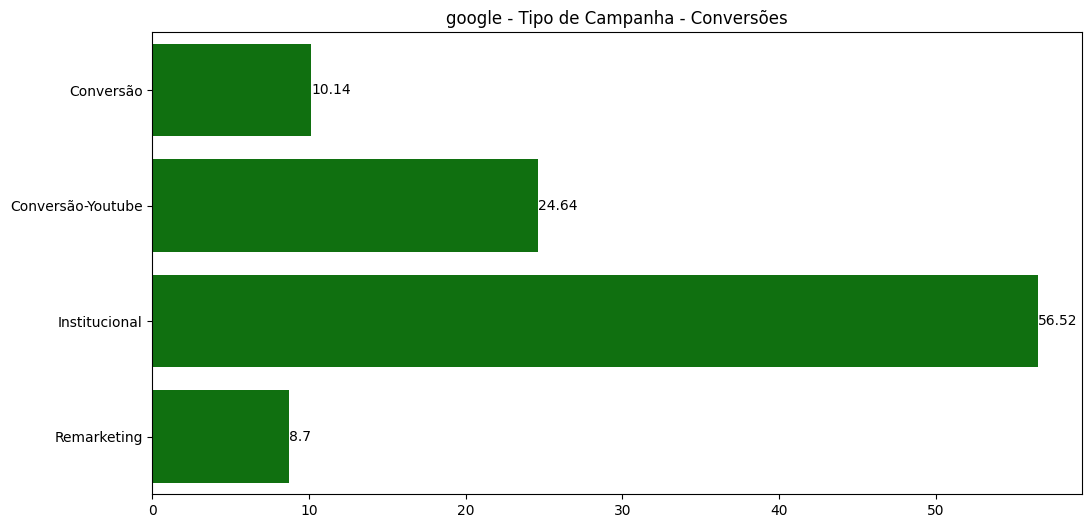

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_campanha_conversoes, x= "%", y= 'Tipo de Campanha', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('google - Tipo de Campanha - Conversões')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
campanha_receita = google['Receita'].groupby(google['Tipo de Campanha']).sum().reset_index()
campanha_receita.columns = ['Tipo de Campanha','Receita']
campanha_receita_perc = (google['Receita'].groupby(google['Tipo de Campanha']).sum()/google['Receita'].sum()*100).reset_index().round(2)
campanha_receita_perc.columns = ['Tipo de Campanha', '%']
freq_campanha_receita = pd.merge(campanha_receita, campanha_receita_perc, on = 'Tipo de Campanha')
freq_campanha_receita

,Tipo de Campanha,Receita,%
0,Conversão,160020,10.01
1,Conversão-Youtube,311550,19.49
2,Institucional,1029120,64.36
3,Remarketing,98205,6.14


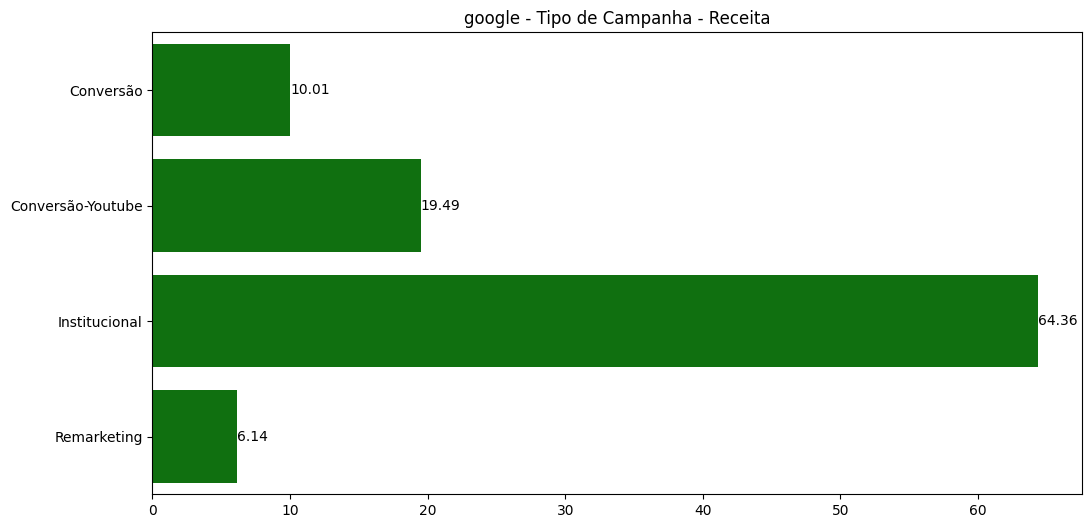

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_campanha_receita, x= "%", y= 'Tipo de Campanha', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('google - Tipo de Campanha - Receita')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

## Produto/Anúncio

In [ ]:
produto_impressoes = google['Impressões do anúncio'].groupby(google['Produto/Anúncio']).sum().reset_index()
produto_impressoes.columns = ['Produto/Anúncio','Impressões do anúncio']
produto_impressoes_perc = (google['Impressões do anúncio'].groupby(google['Produto/Anúncio']).sum()/google['Impressões do anúncio'].sum()*100).reset_index().round(2)
produto_impressoes_perc.columns = ['Produto/Anúncio', '%']
freq_produto_impressao = pd.merge(produto_impressoes, produto_impressoes_perc, on = 'Produto/Anúncio')
freq_produto_impressao

,Produto/Anúncio,Impressões do anúncio,%
0,Empréstimo,11458080,100.0


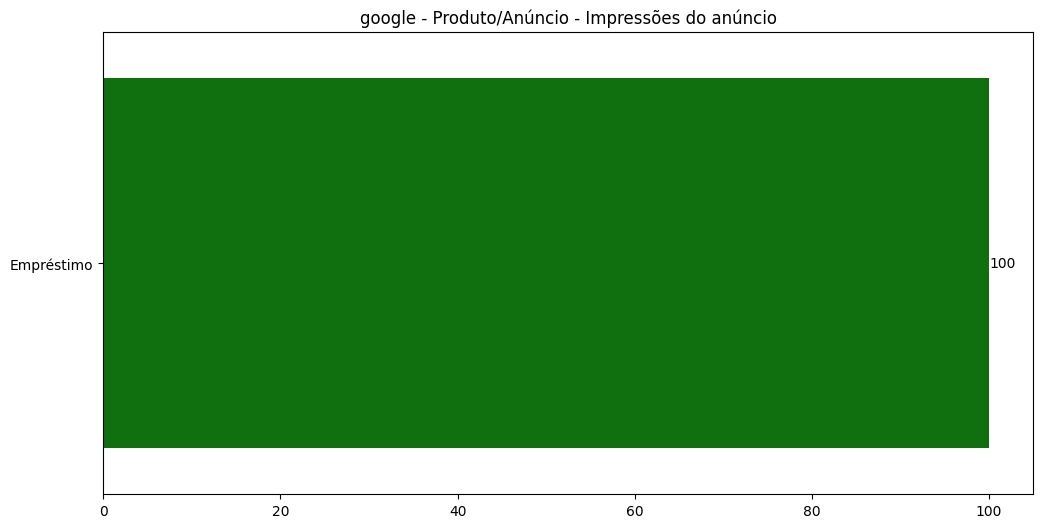

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_produto_impressao, x= "%", y= 'Produto/Anúncio', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('google - Produto/Anúncio - Impressões do anúncio')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
produto_cliques = google['Cliques'].groupby(google['Produto/Anúncio']).sum().reset_index()
produto_cliques.columns = ['Produto/Anúncio','Cliques']
produto_cliques_perc = (google['Cliques'].groupby(google['Produto/Anúncio']).sum()/google['Cliques'].sum()*100).reset_index().round(2)
produto_cliques_perc.columns = ['Produto/Anúncio', '%']
freq_produto_cliques = pd.merge(produto_cliques, produto_cliques_perc, on = 'Produto/Anúncio')
freq_produto_cliques

,Produto/Anúncio,Cliques,%
0,Empréstimo,213370,100.0


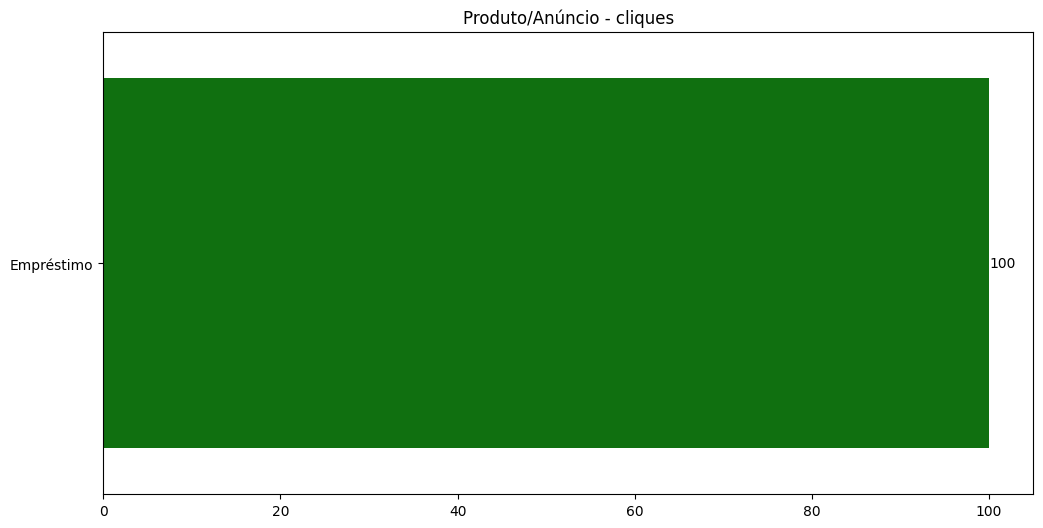

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_produto_cliques, x= "%", y= 'Produto/Anúncio', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('Produto/Anúncio - cliques')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
produto_custo = google['Custo'].groupby(google['Produto/Anúncio']).sum().reset_index()
produto_custo.columns = ['Produto/Anúncio','Custo']
produto_custo_perc = (google['Custo'].groupby(google['Produto/Anúncio']).sum()/google['Custo'].sum()*100).reset_index().round(2)
produto_custo_perc.columns = ['Produto/Anúncio', '%']
freq_produto_custo = pd.merge(produto_custo, produto_custo_perc, on = 'Produto/Anúncio')
freq_produto_custo

,Produto/Anúncio,Custo,%
0,Empréstimo,289683.9,100.0


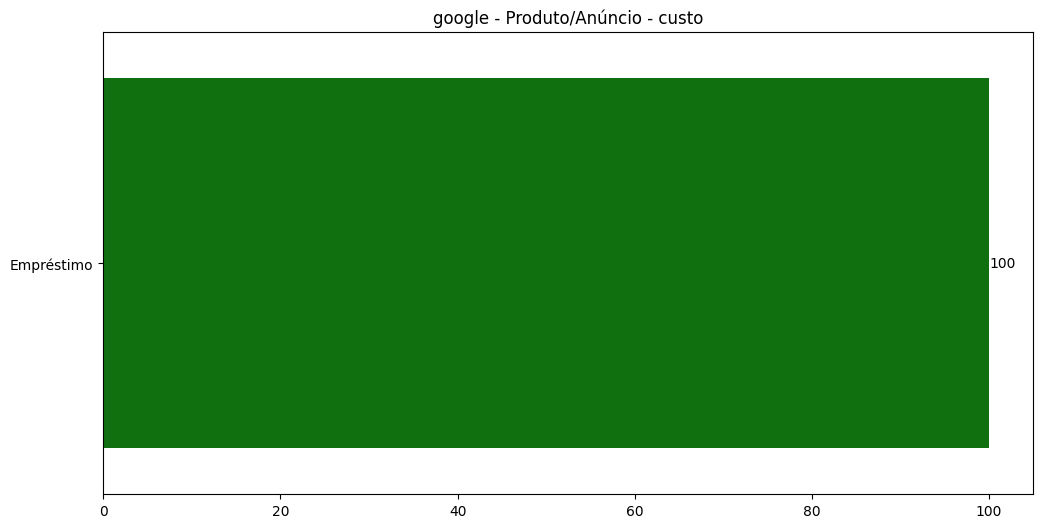

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_produto_custo, x= "%", y= 'Produto/Anúncio', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('google - Produto/Anúncio - custo')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
produto_conversoes = google['Conversões'].groupby(google['Produto/Anúncio']).sum().reset_index()
produto_conversoes.columns = ['Produto/Anúncio','Conversões']
produto_conversoes_perc = (google['Conversões'].groupby(google['Produto/Anúncio']).sum()/google['Conversões'].sum()*100).reset_index().round(2)
produto_conversoes_perc.columns = ['Produto/Anúncio', '%']
freq_produto_conversoes = pd.merge(produto_conversoes, produto_conversoes_perc, on = 'Produto/Anúncio')
freq_produto_conversoes

,Produto/Anúncio,Conversões,%
0,Empréstimo,138,100.0


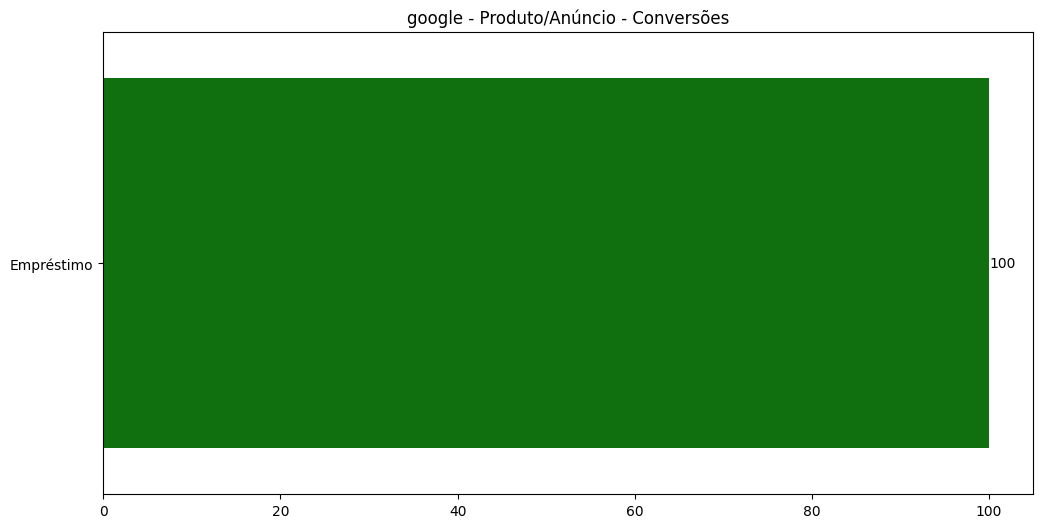

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_produto_conversoes, x= "%", y= 'Produto/Anúncio', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('google - Produto/Anúncio - Conversões')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
produto_receita = google['Receita'].groupby(google['Produto/Anúncio']).sum().reset_index()
produto_receita.columns = ['Produto/Anúncio','Receita']
produto_receita_perc = (google['Receita'].groupby(google['Produto/Anúncio']).sum()/google['Receita'].sum()*100).reset_index().round(2)
produto_receita_perc.columns = ['Produto/Anúncio', '%']
freq_produto_receita = pd.merge(produto_receita, produto_receita_perc, on = 'Produto/Anúncio')
freq_produto_receita

,Produto/Anúncio,Receita,%
0,Empréstimo,1598895,100.0


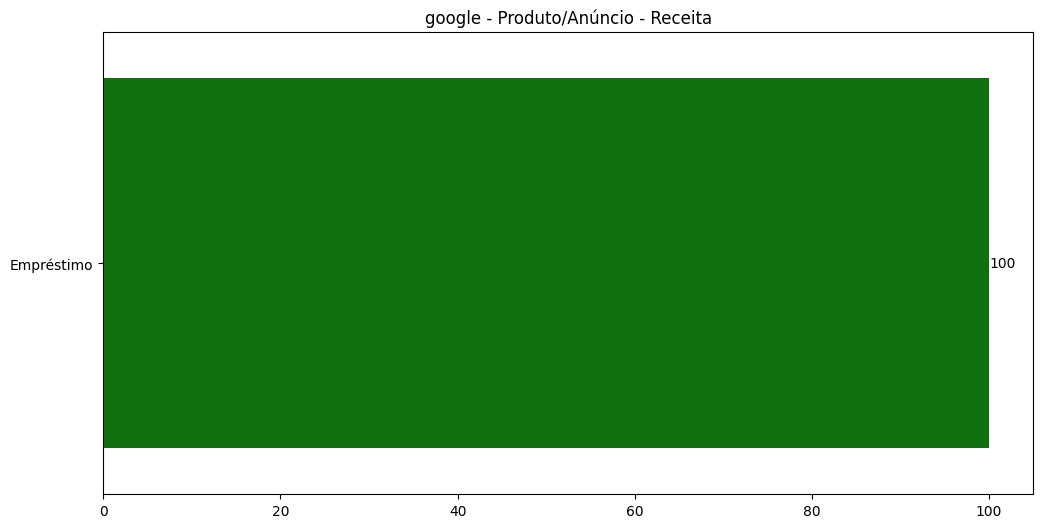

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_produto_receita, x= "%", y= 'Produto/Anúncio', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('google - Produto/Anúncio - Receita')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
google.to_excel("/content/drive/MyDrive/Acelera/Bases tratadas/base_google_tratada.xlsx", index = False)